In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv("Market segmentation example.csv")

In [4]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


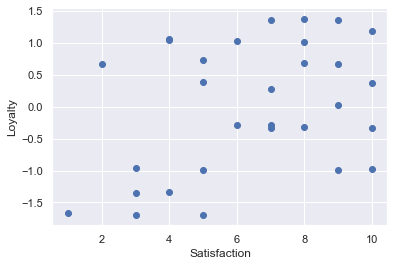

In [6]:
plt.scatter(data["Satisfaction"],data["Loyalty"])
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.show()

In [7]:
x = data.copy()

In [8]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
clusters = x.copy()
clusters["Cluster_pred"] = kmeans.fit_predict(x)

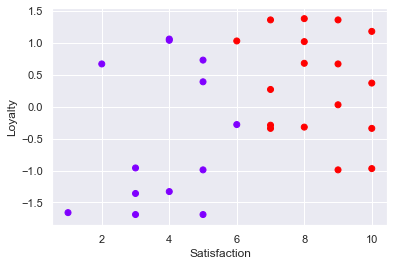

In [10]:
plt.scatter(clusters["Satisfaction"],clusters["Loyalty"],c=clusters["Cluster_pred"],cmap="rainbow")
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.show()

## Standardise the variables

In [12]:
from sklearn import preprocessing

In [13]:
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

## Take advantage of Elbow Method

In [14]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.569489487091783,
 5.34807941029098,
 4.4492366515918995,
 3.81273296330686,
 3.35581485826993]

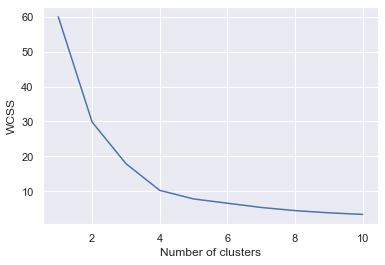

In [15]:
nc = range(1,11)
plt.plot(nc, wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

## Explore the Elbows

In [31]:
kmeans_new = KMeans(9)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new["cluster_pred"] = kmeans_new.fit_predict(x_scaled)

In [32]:
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,6
1,6,-0.28,1
2,5,-0.99,6
3,7,-0.29,1
4,4,1.06,4
5,1,-1.66,2
6,10,-0.97,7
7,8,-0.32,1
8,8,1.02,3
9,8,0.68,3


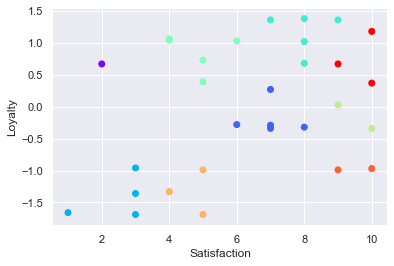

In [33]:
plt.scatter(clusters_new["Satisfaction"],clusters_new["Loyalty"],c=clusters_new["cluster_pred"],cmap="rainbow")
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.show()